## Librerías para el Análisis Exploratorio de Datos

In [11]:
# imports
import os

import numpy as np  
import pandas as pd 

import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_distances 

In [3]:
current = os.getcwd () [ 0 : os.getcwd ().rfind( '\\' ) ]

# movielens dataset path
DATA_PATH = current + '\\dataset\\data.csv'
ITEM_PATH = current + '\\dataset\\item.csv'
USER_PATH = current + '\\dataset\\user.csv'

In [4]:
def load_set (name: str) -> pd.DataFrame: 

  if name == 'DATA':
    columns = [ 'userID', 'itemID', 'rating', 'timestamp' ]
    df = pd.read_csv ( 
      DATA_PATH, 
      names=columns, 
      sep='\t', 
      encoding='latin-1', 
      skipinitialspace=True 
    )
    df = df.drop ( columns= [ 'timestamp' ] )
    return df
  
  if name == 'USER':
    columns = [ 'userID', 'age', 'gender', 'occupation', 'zipCode' ]
    df = pd.read_csv ( 
      USER_PATH, 
      names=columns, 
      sep='|', 
      encoding='latin-1', 
      skipinitialspace=True 
    )
    df = df.drop ( columns= [ 'zipCode' ] )
    return df
  
  if name == 'ITEM':
    columns = [ 
      'itemID', 
      'name', 
      'releaseDate', 
      'videoReleaseDate', 
      'IMDbURL', 
      'gender_unknown', 
      'gender_action', 
      'gender_adventure', 
      'gender_animation', 
      'gender_children', 
      'gender_comedy',
      'gender_crime',
      'gender_documentary',
      'gender_drama',
      'gender_fantasy',
      'gender_film_noir',
      'gender_horror',
      'gender_musical',
      'gender_mystery',
      'gender_romance',
      'gender_scifi',
      'gender_thriller',
      'gender_war',
      'gender_western',
    ]
    df = pd.read_csv ( 
      ITEM_PATH, 
      names=columns, 
      sep='|', 
      encoding='latin-1', 
      skipinitialspace=True 
    )
    df = df.drop ( columns= [ 'videoReleaseDate', 'IMDbURL' ] )
    return df


In [5]:
df_data = load_set ( 'DATA' )
df_data

,userID,itemID,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


In [6]:
df_item = load_set ( 'ITEM' )
df_item

,itemID,name,releaseDate,gender_unknown,gender_action,gender_adventure,gender_animation,gender_children,gender_comedy,gender_crime,...,gender_fantasy,gender_film_noir,gender_horror,gender_musical,gender_mystery,gender_romance,gender_scifi,gender_thriller,gender_war,gender_western
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_user = load_set ( 'USER' )
df_user

,userID,age,gender,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other
...,...,...,...,...
938,939,26,F,student
939,940,32,M,administrator
940,941,20,M,student
941,942,48,F,librarian


Ahora vamos a definir diferentes análisis sobre los datos 

## Matriz de Similitud: Distancias por Coseno

Calcular en una nueva matriz la similitud entre usuarios

In [9]:
# 1. Pivotar el DataFrame para facilitar el calculo de la matriz de similitud
pivot_df = df_data.pivot ( index='userID', columns='itemID', values='rating' ).fillna ( 0 )

# 2. Normalizar los datos para que cada usuario tenga un promedio de calificacion
normalized_pivot_df = pivot_df.div ( pivot_df.sum( axis=1 ), axis=0 )

# 3. Convertir el DataFrame normalizado a una matriz de NumPy
user_profiles = normalized_pivot_df.values

# 4. Calcular la matriz de similitud coseno
sim_matrix = cosine_distances ( user_profiles )

sim_matrix

array([[0.        , 0.83306902, 0.95254046, ..., 0.85138306, 0.82049212,
        0.60182526],
       [0.83306902, 0.        , 0.88940868, ..., 0.83851522, 0.82773219,
        0.89420212],
       [0.95254046, 0.88940868, 0.        , ..., 0.89875744, 0.86658385,
        0.97344413],
       ...,
       [0.85138306, 0.83851522, 0.89875744, ..., 0.        , 0.8983582 ,
        0.90488042],
       [0.82049212, 0.82773219, 0.86658385, ..., 0.8983582 , 0.        ,
        0.81753534],
       [0.60182526, 0.89420212, 0.97344413, ..., 0.90488042, 0.81753534,
        0.        ]])

In [10]:
sim_matrix.shape

(943, 943)

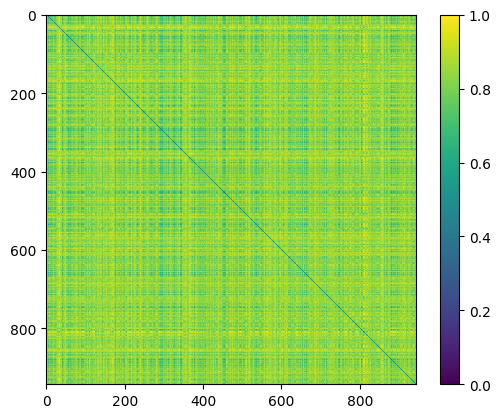

In [12]:
plt.imshow(sim_matrix);
plt.colorbar()
plt.show()

Son muchos datos, aplicar SVD o split al dataset?